<a href="https://colab.research.google.com/github/Monalika-P/Vision-based-Human-Activity-Recognitio/blob/main/VB_HAR_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
!unrar x UCF50.rar -inul -y

--2021-06-28 02:26:47--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  30.8MB/s    in 50s     

2021-06-28 02:27:38 (61.7 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]



In [ ]:
!pip install pafy
!pip install pafy youtube-dl moviepy

     |████████████████████████████████| 1.9MB 6.9MB/s 


In [ ]:
import os

import cv2

import math

import pafy

import random

import numpy as np

import datetime as dt

import tensorflow as tf

from moviepy.editor import *
from collections import deque

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2236416/45929032 bytes (4.9%)5283840/45929032 bytes (11.5%)7766016/45929032 bytes (16.9%)10526720/45929032 bytes (22.9%)13393920/45929032 bytes (29.2%)16252928/45929032 bytes (35.4%)19120128/45929032 bytes (41.6%)22274048/45929032 bytes (48.5%)24215552/45929032 bytes (52.7%)25468928/45929032 bytes (55.5%)28508160/45929032 bytes (62.1%)31645696/45929032 bytes (68.9%)

In [5]:
image_height, image_width = 64, 64

max_images_per_class = 2000

dataset_directory = "UCF50"

classes_list = ['WalkingWithDog', 'HorseRace','JumpingJack','HulaHoop','YoYo','PizzaTossing']

model_output_size = len(classes_list)

In [6]:
def frames_extraction(video_path):

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    while True:

        success, frame = video_reader.read()

        if not success:

            break

        resized_frame = cv2.resize(frame, (image_height, image_width))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)

    video_reader.release()

    return frames_list

In [7]:
def create_dataset():

    temp_features = []

    features = []

    labels = []

    for class_index, class_name in enumerate(classes_list):

        print(f'Extracting Data of Class: {class_name}')

        files_list = os.listdir(os.path.join(dataset_directory, class_name))

        for file_name in files_list:

            video_file_path = os.path.join(dataset_directory, class_name, file_name)

            frames = frames_extraction(video_file_path)

            temp_features.extend(frames)

        features.extend(random.sample(temp_features, max_images_per_class))

        labels.extend([class_index] * max_images_per_class)

        temp_features.clear()

    features = np.asarray(features)

    labels = np.array(labels) 

    return features, labels


In [8]:
features, labels = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: HorseRace
Extracting Data of Class: JumpingJack
Extracting Data of Class: HulaHoop
Extracting Data of Class: YoYo
Extracting Data of Class: PizzaTossing


In [9]:
import joblib

In [12]:
joblib.dump(features, '/content/drive/MyDrive/HARModels/new_features.pickle')

['/content/drive/MyDrive/HARModels/new_features.pickle']

In [13]:
joblib.dump(labels, '/content/drive/MyDrive/HARModels/new_labels.pickle')

['/content/drive/MyDrive/HARModels/new_labels.pickle']

In [14]:
features = joblib.load('/content/drive/MyDrive/HARModels/new_features.pickle')

In [15]:
features

array([[[[0.10588235, 0.08627451, 0.09019608],
         [0.14509804, 0.1254902 , 0.12941176],
         [0.05490196, 0.03529412, 0.03921569],
         ...,
         [0.07058824, 0.03529412, 0.05098039],
         [0.07058824, 0.03529412, 0.05098039],
         [0.07058824, 0.03529412, 0.05098039]],

        [[0.0745098 , 0.05490196, 0.05882353],
         [0.12156863, 0.10196078, 0.10588235],
         [0.09411765, 0.0745098 , 0.07843137],
         ...,
         [0.14901961, 0.11372549, 0.12941176],
         [0.14901961, 0.11372549, 0.12941176],
         [0.14901961, 0.11372549, 0.12941176]],

        [[0.0627451 , 0.04313725, 0.04705882],
         [0.0627451 , 0.04313725, 0.04705882],
         [0.09019608, 0.07058824, 0.0745098 ],
         ...,
         [0.09803922, 0.0627451 , 0.07843137],
         [0.09803922, 0.0627451 , 0.07843137],
         [0.09803922, 0.0627451 , 0.07843137]],

        ...,

        [[0.19215686, 0.21960784, 0.24313725],
         [0.19215686, 0.21568627, 0.25098039]

In [17]:
labels = joblib.load('/content/drive/MyDrive/HARModels/new_labels.pickle')

In [18]:
labels

array([0, 0, 0, ..., 5, 5, 5])

In [19]:
one_hot_encoded_labels = to_categorical(labels)

In [20]:
seed_constant = 23

np.random.seed(seed_constant)

random.seed(seed_constant)

tf.random.set_seed(seed_constant)


In [21]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = seed_constant)

In [60]:
def create_model():

   # We will use a Sequential model for model construction
    model = Sequential()
    model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(64,64,64,3)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.5))
    model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))
    model.add(BatchNormalization(center=True, scale=True))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))  

    # Printing the models summary

    model.summary()

    return model
# Calling the create_model method
model = create_model()
print("Model created successfully")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 62, 62, 62, 32)    2624      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 31, 31, 31, 32)    0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 31, 32)    128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 31, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 29, 29, 29, 64)    55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 14, 14, 64)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 14, 64)   

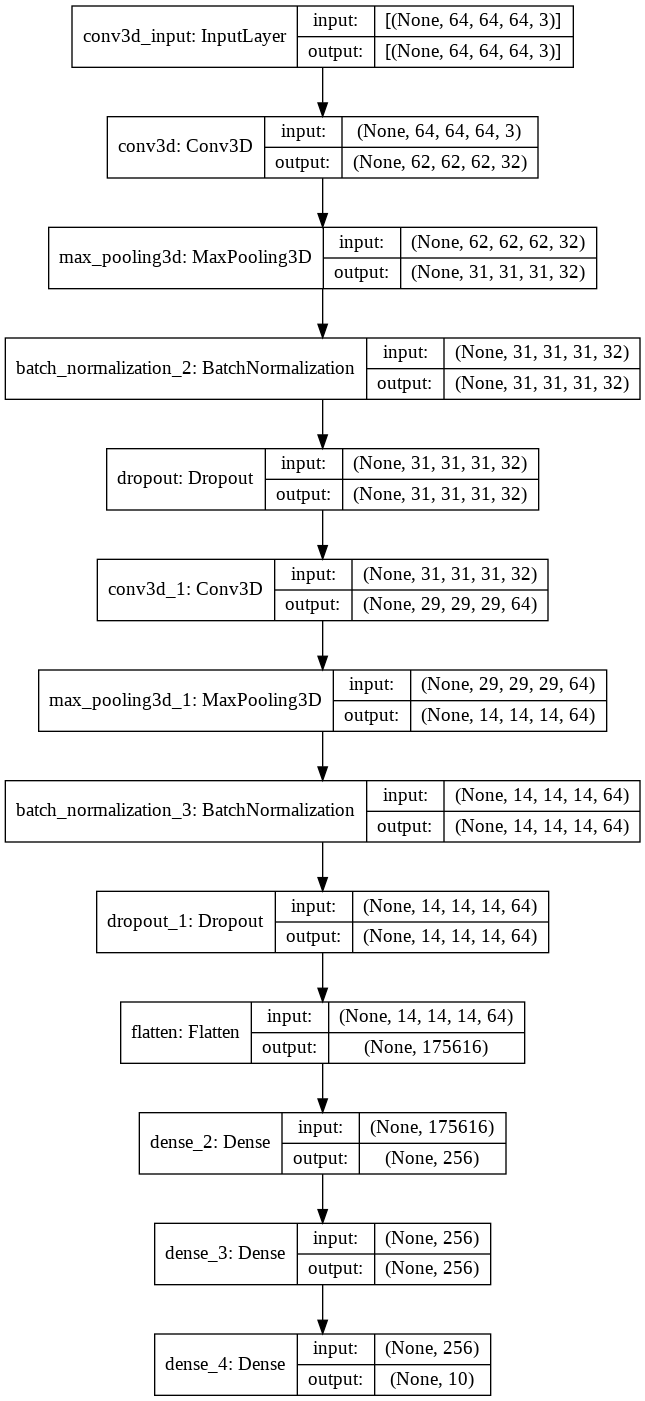

In [61]:
	plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [23]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True, verbose = 1)

checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/HAR/har_new.h5', monitor = 'val_loss', verbose = 1, save_best_only = True,
                                                mode = 'min')

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = features_train, y = labels_train, epochs = 20, batch_size = 32 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback, checkpoint])

Epoch 1/20
240/240 [==============================] - 211s 874ms/step - loss: 0.8870 - accuracy: 0.6918 - val_loss: 1.6236 - val_accuracy: 0.3177

Epoch 00001: val_loss improved from inf to 1.62357, saving model to /content/drive/MyDrive/HAR/har_new.h5
Epoch 2/20
240/240 [==============================] - 210s 873ms/step - loss: 0.4425 - accuracy: 0.8523 - val_loss: 0.8508 - val_accuracy: 0.6870

Epoch 00002: val_loss improved from 1.62357 to 0.85077, saving model to /content/drive/MyDrive/HAR/har_new.h5
Epoch 3/20
240/240 [==============================] - 212s 885ms/step - loss: 0.2489 - accuracy: 0.9220 - val_loss: 0.5930 - val_accuracy: 0.7964

Epoch 00003: val_loss improved from 0.85077 to 0.59298, saving model to /content/drive/MyDrive/HAR/har_new.h5
Epoch 4/20
240/240 [==============================] - 210s 876ms/step - loss: 0.1550 - accuracy: 0.9520 - val_loss: 0.2974 - val_accuracy: 0.8995

Epoch 00004: val_loss improved from 0.59298 to 0.29737, saving model to /content/drive

In [62]:
def plot_metric(metric_name_1, metric_name_2, plot_name):

  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]
  # Constructing a range object which will be used as time

  epochs = range(len(metric_value_1))
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  # Adding title to the plot
  plt.title(str(plot_name))
  # Adding legend to the plot
  plt.legend()

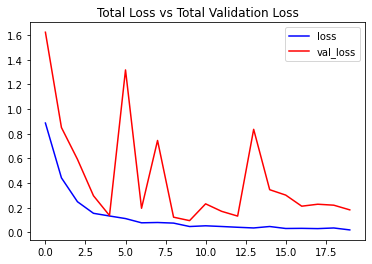

In [63]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

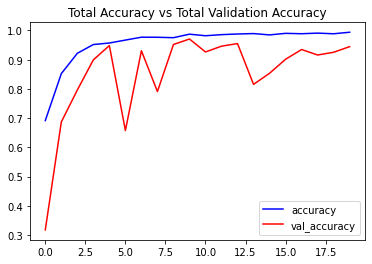

In [64]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [24]:
model_evaluation_history = model.evaluate(features_test, labels_test)


75/75 [==============================] - 15s 198ms/step - loss: 0.1723 - accuracy: 0.9533


In [25]:
model.save('/content/drive/MyDrive/HAR/har_new.h5')


In [27]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/HAR/har_new.h5')

In [29]:
labels_pred = loaded_model.predict(features_test)

In [32]:
features_test

array([[6.8396249e-09, 2.0181765e-06, 3.1774978e-11, 9.9859756e-01,
        1.3989024e-03, 1.5858595e-06],
       [2.7494303e-07, 1.2171749e-03, 2.7278216e-10, 9.9861896e-01,
        3.6869028e-09, 1.6361977e-04],
       [1.1124465e-05, 1.3070870e-02, 1.9030020e-07, 9.6302883e-06,
        2.5781894e-03, 9.8433000e-01],
       ...,
       [2.1685970e-08, 1.9721128e-07, 8.9311891e-10, 9.9963236e-01,
        3.6687142e-04, 4.4976110e-07],
       [5.9929234e-04, 1.7991107e-02, 1.1227862e-02, 9.6701795e-01,
        1.2346350e-03, 1.9292232e-03],
       [9.1314281e-09, 1.3724544e-07, 4.1302620e-10, 9.9994612e-01,
        5.3804528e-05, 7.7624607e-10]], dtype=float32)

In [42]:
type(np.array(np.unique(features_test)))

numpy.ndarray

In [43]:
type(np.array(np.unique(labels_pred)))

numpy.ndarray

In [44]:
labels_pred = np.argmax(labels_pred,axis=1)

In [46]:
labels_pred[0]

3

In [51]:
labels_test = np.argmax(labels_test,axis=1)

In [52]:
labels_test[0]

3

In [54]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels_test, labels_pred)

In [55]:
confusion

array([[414,   4,   0,   1,   1,   1],
       [  1, 400,   0,   0,   0,   0],
       [ 12,   1, 285,  63,   1,  10],
       [  3,   0,   0, 401,   0,   2],
       [  0,   0,   0,   0, 385,   0],
       [  1,   1,   0,   3,   7, 403]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(labels_test, labels_pred, target_names=['WalkingWithDog', 'HorseRace','JumpingJack','HulaHoop','YoYo','PizzaTossing']))


Classification Report

                precision    recall  f1-score   support

WalkingWithDog       0.96      0.98      0.97       421
     HorseRace       0.99      1.00      0.99       401
   JumpingJack       1.00      0.77      0.87       372
      HulaHoop       0.86      0.99      0.92       406
          YoYo       0.98      1.00      0.99       385
  PizzaTossing       0.97      0.97      0.97       415

      accuracy                           0.95      2400
     macro avg       0.96      0.95      0.95      2400
  weighted avg       0.96      0.95      0.95      2400



In [66]:
from sklearn.metrics import accuracy_score
score = accuracy_score(labels_test, labels_pred)
print(score*100)

95.33333333333334
